In [2]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import collections
from matplotlib import image

from math import *;

%matplotlib inline

In [3]:

Cv = 4100
rho = 1040;
ktherm = 0.5


w_perfusionRate = 0.002

#Nyborg parameterization
kappa = ktherm / (rho*Cv);
tau = 1/w_perfusionRate

K = Cv*kappa
L = sqrt(kappa*tau)

dv=1
qvdot_wattsPerVolume = 1000/dv
C = qvdot_wattsPerVolume*dv/(8*pi*K)

def T(r,t):
    tstar = np.sqrt(t/tau)
    R = r/np.sqrt(4*kappa*t)
    return (C/r)*(np.exp(-r/L)*(2 - erfc(tstar - R)) + np.exp(r/L)*erfc(tstar + R) )

In [4]:
r = np.logspace( log10(0.01*L), log10(2*L),100)
t = np.logspace( log10(0.01*tau), log10(2*tau),100)



In [12]:
r = np.linspace( (0.01*L), (0.2*L),100)
t = np.linspace( (0.01*tau), (0.2*tau),100)


In [13]:


Tm = np.zeros([len(r),len(t)])
ti=0
for tq in t:
    ri=0
    for rq in r:
        Tm[ri,ti] = T(rq,tq)
        ri+=1
    ti+=1

gr,gt= np.meshgrid( r,t,sparse=False, indexing='ij' )




In [25]:
map( lambda r: T(r, 0.1), r)

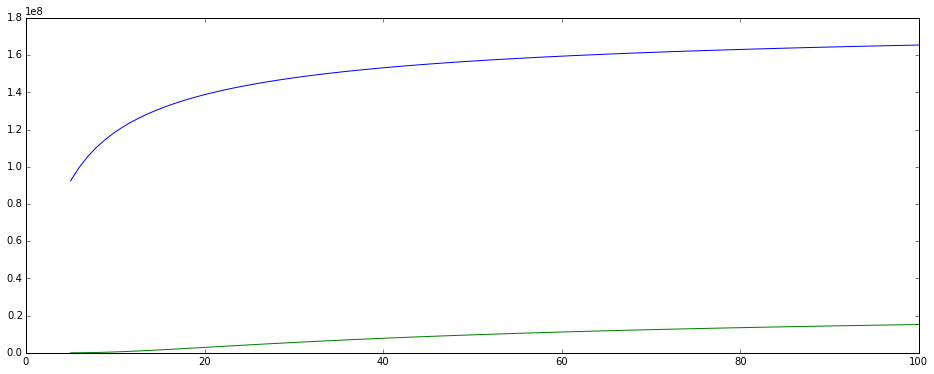

In [15]:
fig = plt.figure(figsize=(16,6), dpi=72)

plt.plot(t, list(map( lambda t: T(0.1*L, t), t)))
plt.plot(t, list(map( lambda t: T(0.5*L, t), t)))
plt.plot(t, list(map( lambda t: T(3*L, t), t)))


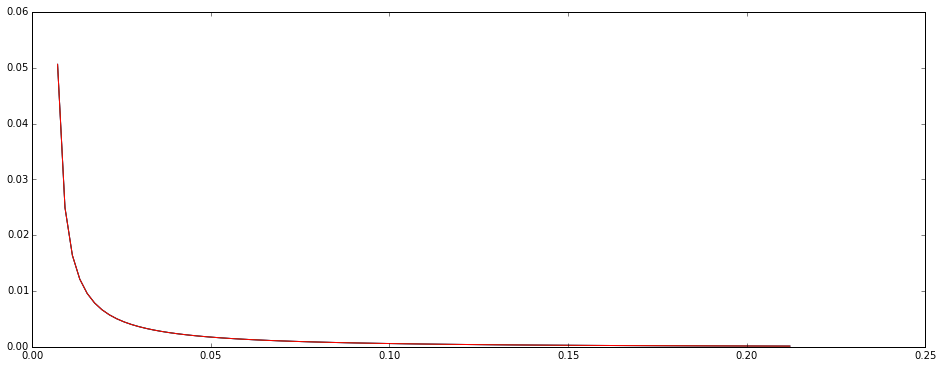

In [37]:
fig = plt.figure(figsize=(16,6), dpi=72)

plt.plot(r, list(map( lambda r: T(r, 0.1), t)))
plt.plot(r, list(map( lambda r: T(r, 8), t)))
plt.plot(r, list(map( lambda r: T(r, 10), t)))

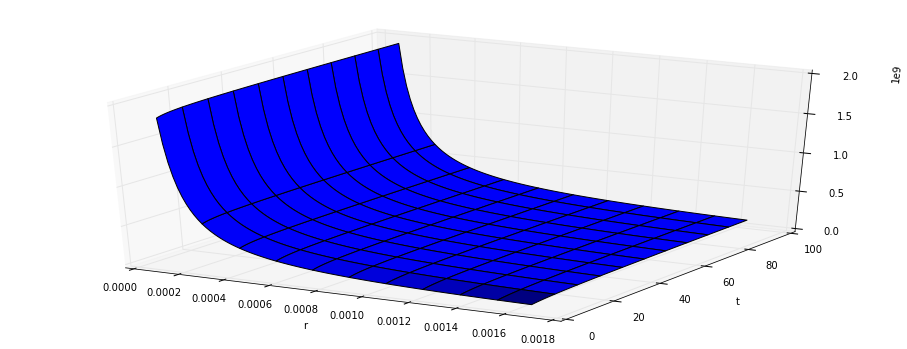

In [14]:
fig = plt.figure(figsize=(16,6), dpi=72)

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface( gr, gt, Tm)
ax.set_xlabel('r')
ax.set_ylabel('t')

In [42]:
Tm.shape

(3, 2)

In [43]:
coords[0].shape

(2, 3)

In [24]:
T(0.01 , 10)

0.01844624957716989